In [1]:
import pandas as pd

file_path = r"C:\Users\mahig\Downloads\Prediction_Data.xlsx"
sheet_name = "vw_churndata"

# Read without assuming the first row is headers
raw_data = pd.read_excel(file_path, sheet_name=sheet_name)
print(raw_data.head())


  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   34135-MAH  Female   21      No    Maharashtra                    9   
1   89530-KAR  Female   58     Yes      Karnataka                   15   
2   69173-TAM    Male   27      No     Tamil Nadu                    9   
3   22286-HAR  Female   54     Yes        Haryana                    6   
4   66581-UTT  Female   73     Yes  Uttar Pradesh                    8   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 6        NaN           Yes            Yes  ...   
1                33     Deal 1           Yes            Yes  ...   
2                27     Deal 5           Yes             No  ...   
3                36        NaN           Yes            Yes  ...   
4                32     Deal 3           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      71.400002   1212.099976           0.0   
1  Bank Withdraw

In [2]:
#import libraries and load data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
#Define the path to the excel file
file_path=r"C:\Users\mahig\Downloads\Prediction_Data.xlsx"
#Define the sheet name to read data from
sheet_name="vw_churndata"
#Read the data from specified sheet into a pandas dataframe
data=pd.read_excel(file_path,sheet_name =sheet_name)
#Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   34135-MAH  Female   21      No    Maharashtra                    9   
1   89530-KAR  Female   58     Yes      Karnataka                   15   
2   69173-TAM    Male   27      No     Tamil Nadu                    9   
3   22286-HAR  Female   54     Yes        Haryana                    6   
4   66581-UTT  Female   73     Yes  Uttar Pradesh                    8   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 6        NaN           Yes            Yes  ...   
1                33     Deal 1           Yes            Yes  ...   
2                27     Deal 5           Yes             No  ...   
3                36        NaN           Yes            Yes  ...   
4                32     Deal 3           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      71.400002   1212.099976           0.0   
1  Bank Withdraw

In [3]:
print(data.columns.tolist())


['Customer_ID', 'Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason']


In [4]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason','Married','Online_Backup',
    'Device_Protection_Plan', 'Streaming_Music','Gender','Phone_Service', 'Multiple_Lines','Streaming_TV', 'Streaming_Movies' ,
    'Unlimited_Data' ], axis=1)

# List of columns to be label encoded
columns_to_encode = [
     'State', 'Value_Deal','Internet_Service', 'Internet_Type', 'Online_Security', 'Premium_Support', 'Contract', 'Paperless_Billing','Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Train Random forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Confusion Matrix:
[[803  62]
 [122 215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       865
           1       0.78      0.64      0.70       337

    accuracy                           0.85      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.85      0.84      1202



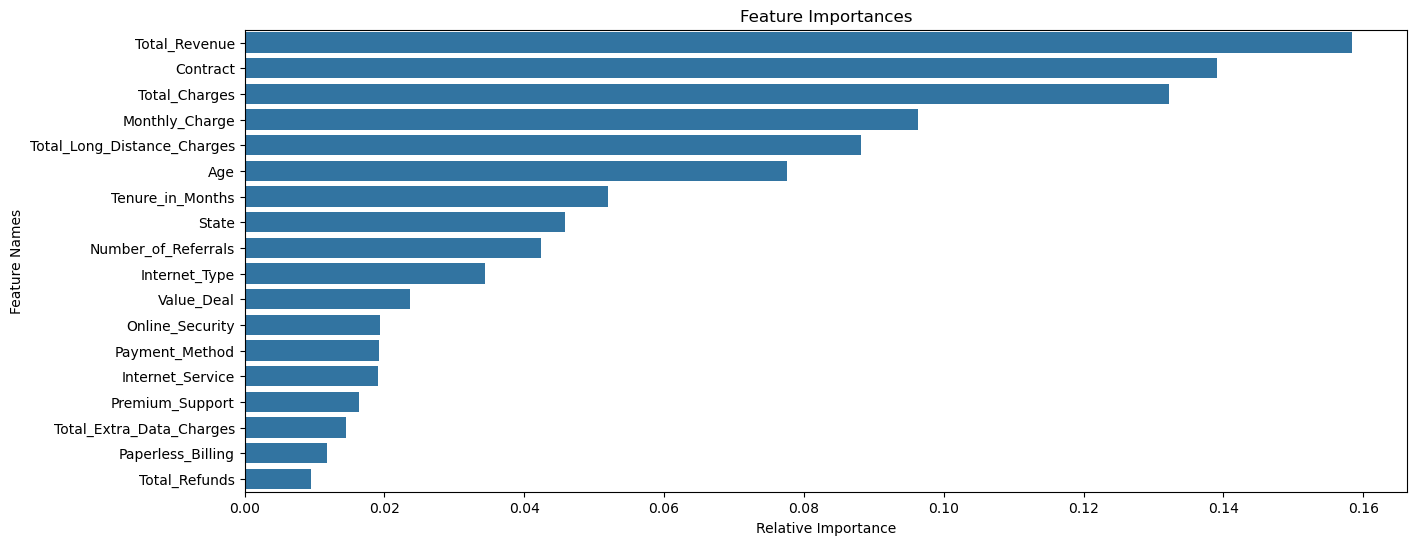

In [7]:
#Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [9]:
import pandas as pd

# ==========  Load Joiner Data ==========
file_path = r"C:\Users\mahig\Downloads\Prediction_Data.xlsx"
sheet_name = 'vw_joindata'

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

print("Data Loaded Successfully.")
print("Total records:", len(new_data))

# Keep original copy
original_data = new_data.copy()

# ==========  Drop Columns Not Used in Training ==========
new_data = new_data.drop(
    ['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
    axis=1,
    errors='ignore'
)

# ==========  Encode Using Training Label Encoders ==========
for column in columns_to_encode:
    if column in new_data.columns:
        new_data[column] = label_encoders[column].transform(new_data[column])

# ==========  Align Column Order with Training Data ==========
new_data = new_data[X.columns]

# ==========  Make Predictions ==========
new_predictions = rf_model.predict(new_data)

print("Prediction Completed.")
print("Prediction Distribution:")
print(pd.Series(new_predictions).value_counts())

# ==========  Attach Predictions ==========
original_data['Customer_Status_Predicted'] = new_predictions

# ==========  Filter Only Churned Customers ==========
churned_customers = original_data[
    original_data['Customer_Status_Predicted'] == 1
]

print("Total Churn Predicted:", len(churned_customers))

# ==========  Save Output ==========
output_path = r"C:\Users\mahig\Downloads\Prediction_Output.xlsx"
churned_customers.to_excel(output_path, index=False)

print("Output file saved at:", output_path)

Data Loaded Successfully.
Total records: 411
Prediction Completed.
Prediction Distribution:
1    375
0     36
Name: count, dtype: int64
Total Churn Predicted: 375
Output file saved at: C:\Users\mahig\Downloads\Prediction_Output.xlsx


In [10]:
print(y.value_counts())

Customer_Status
0    4275
1    1732
Name: count, dtype: int64


In [11]:
probs = rf_model.predict_proba(new_data)[:,1]

original_data['Churn_Probability'] = probs

print(original_data['Churn_Probability'].describe())

count    411.000000
mean       0.859319
std        0.194773
min        0.000000
25%        0.805000
50%        0.950000
75%        0.980000
max        1.000000
Name: Churn_Probability, dtype: float64


In [12]:
print(original_data['Tenure_in_Months'].describe())

count    411.000000
mean      16.586375
std       10.314764
min        1.000000
25%        8.000000
50%       15.000000
75%       25.000000
max       36.000000
Name: Tenure_in_Months, dtype: float64


In [13]:
print(original_data['Contract'].value_counts())

Contract
Month-to-Month    367
One Year           24
Two Year           20
Name: count, dtype: int64


In [14]:
print(original_data['Monthly_Charge'].describe())

count    411.000000
mean      42.683455
std       24.789735
min       -8.000000
25%       20.150000
50%       43.950001
75%       63.499998
max      107.949997
Name: Monthly_Charge, dtype: float64


In [15]:
original_data.sort_values(by='Churn_Probability', ascending=False)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predicted,Churn_Probability
409,84770-UTT,Female,38,Yes,Uttar Pradesh,2,21,NaN,Yes,No,...,20.150000,0.00,0,27.590000,47.740002,Joined,Others,Others,1,1.00
381,66669-HAR,Male,44,No,Haryana,12,32,Deal 5,Yes,No,...,44.049999,0.00,0,30.730000,74.779999,Joined,Others,Others,1,1.00
23,14567-TAM,Male,43,No,Tamil Nadu,1,9,NaN,Yes,No,...,20.350000,0.00,0,44.090000,64.440002,Joined,Others,Others,1,1.00
367,85031-RAJ,Female,60,No,Rajasthan,1,4,Deal 5,Yes,No,...,44.000000,0.00,0,13.400000,57.400002,Joined,Others,Others,1,1.00
29,12469-AND,Male,24,Yes,Andhra Pradesh,11,4,NaN,Yes,No,...,55.299999,0.00,0,36.689999,91.989998,Joined,Others,Others,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,35606-BIH,Male,76,Yes,Bihar,12,18,Deal 5,Yes,No,...,202.899994,5.49,10,124.320000,331.730011,Joined,Others,Others,0,0.21
374,46479-GUJ,Male,41,Yes,Gujarat,0,13,NaN,Yes,No,...,213.350006,2.62,0,111.000000,321.730011,Joined,Others,Others,0,0.19
305,91505-DEL,Male,62,Yes,Delhi,13,36,Deal 5,Yes,Yes,...,335.750000,0.00,0,113.339996,449.089996,Joined,Others,Others,0,0.19
295,38779-HAR,Female,25,No,Haryana,13,19,NaN,Yes,No,...,75.449997,0.00,0,113.550003,189.000000,Joined,Others,Others,0,0.12
